In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [4]:
ha_df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Data Exploration

In [5]:
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
# comprobacion de valores perdidos:
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
ha_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
#chequeo de rows duplicados:
ha_df.duplicated().sum()

1

In [11]:
ha_df = ha_df.drop_duplicates()
ha_df.duplicated().sum()

0

In [12]:
#EDA:
ha_df[col_num].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [15]:
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

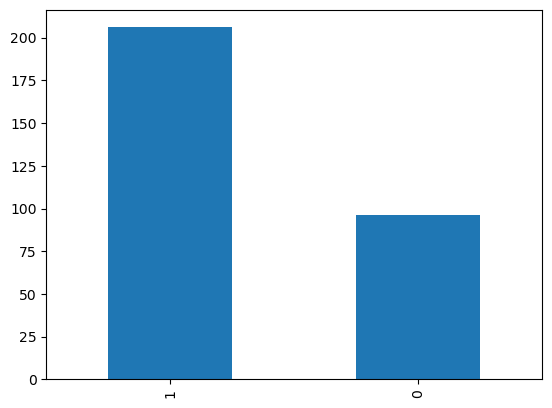

Values in column sex : 
0     96
1    206
Name: sex, dtype: int64




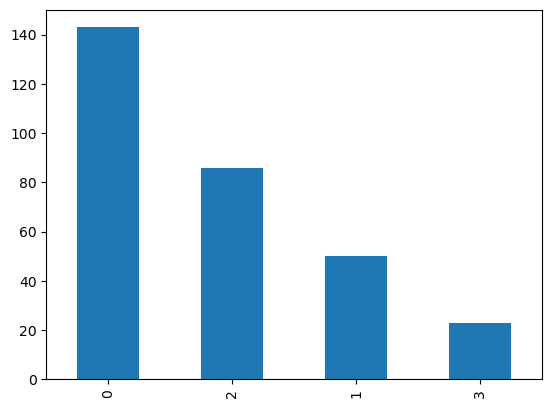

Values in column cp : 
0    143
1     50
2     86
3     23
Name: cp, dtype: int64




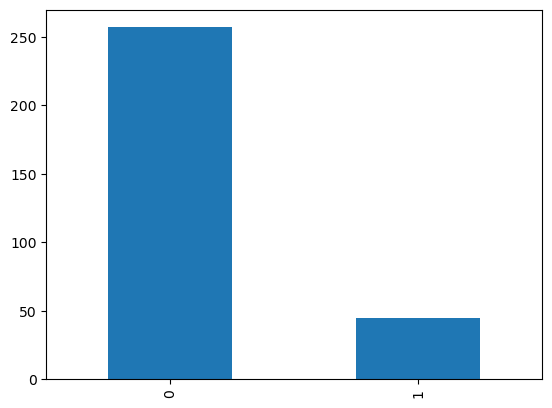

Values in column fbs : 
0    257
1     45
Name: fbs, dtype: int64




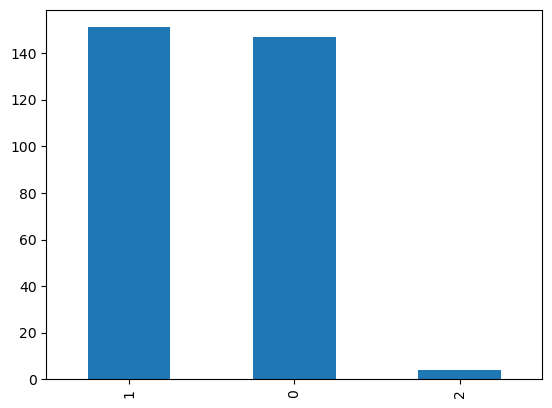

Values in column restecg : 
0    147
1    151
2      4
Name: restecg, dtype: int64




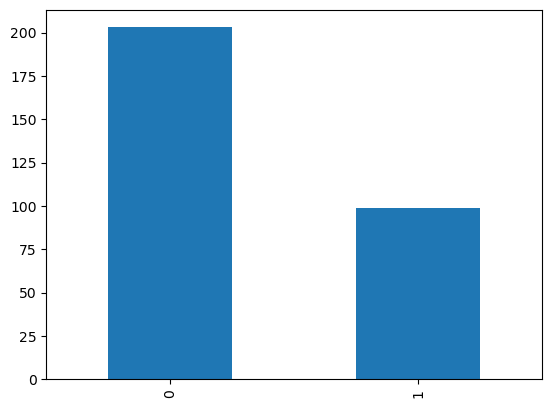

Values in column exng : 
0    203
1     99
Name: exng, dtype: int64




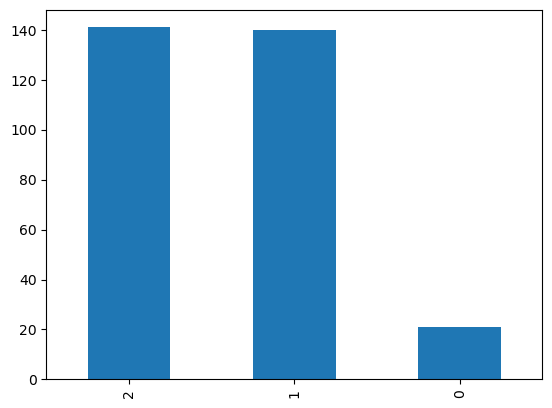

Values in column slp : 
0     21
1    140
2    141
Name: slp, dtype: int64




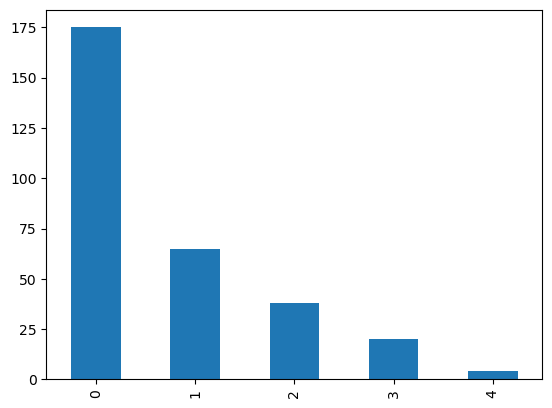

Values in column caa : 
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64




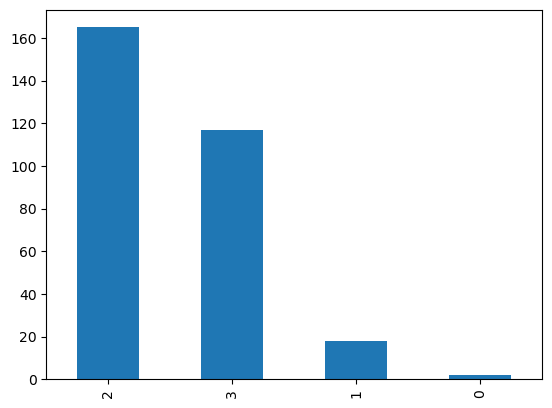

Values in column thall : 
0      2
1     18
2    165
3    117
Name: thall, dtype: int64




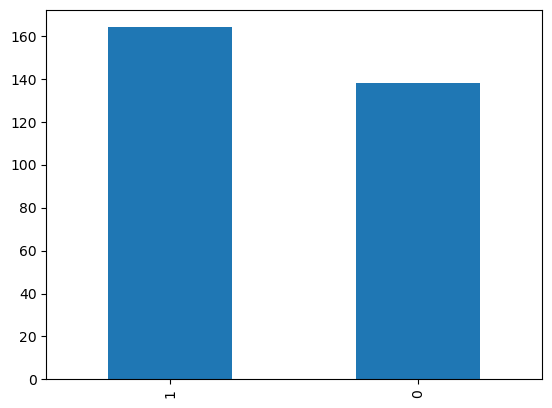

Values in column output : 
0    138
1    164
Name: output, dtype: int64




In [25]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']

for i in categorical_cols:
    ha_df[i].value_counts().plot(kind='bar')
    plt.show()
    print('Values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
    print('\n')
    

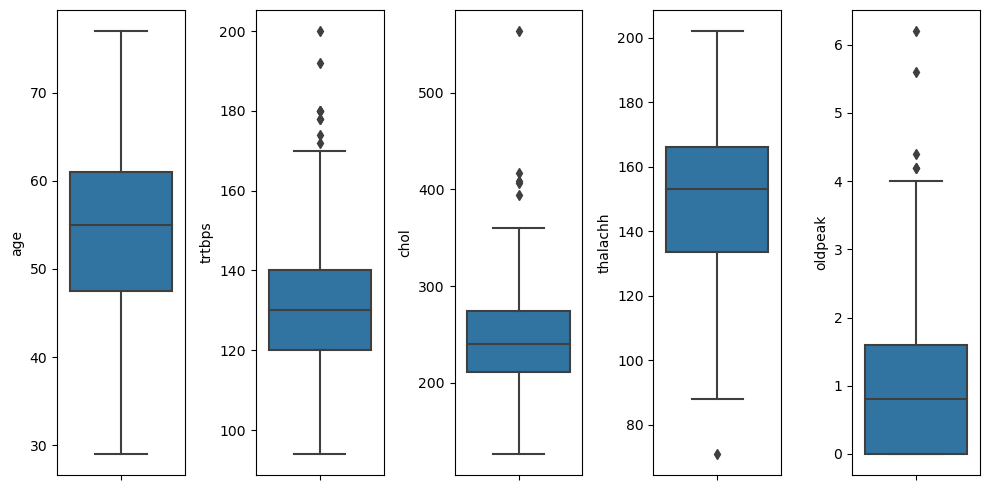

In [8]:
#distribuscion de valores numericos
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

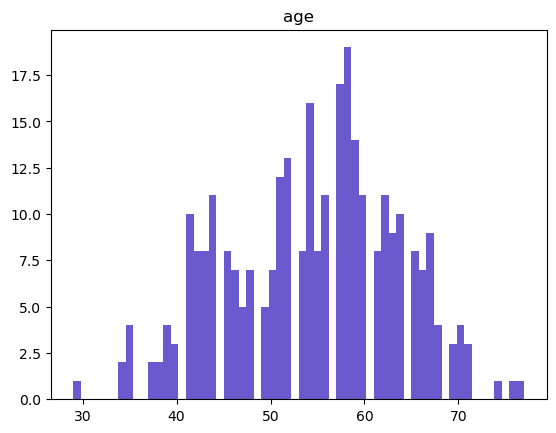

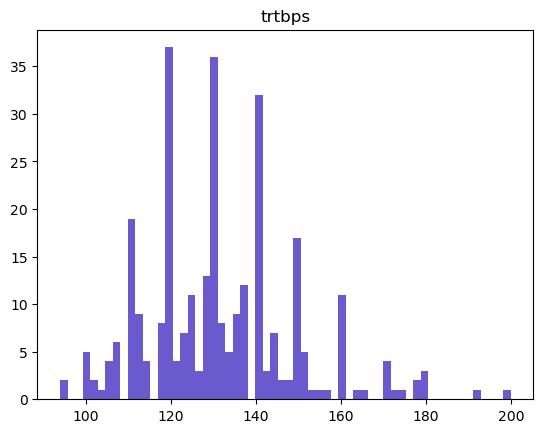

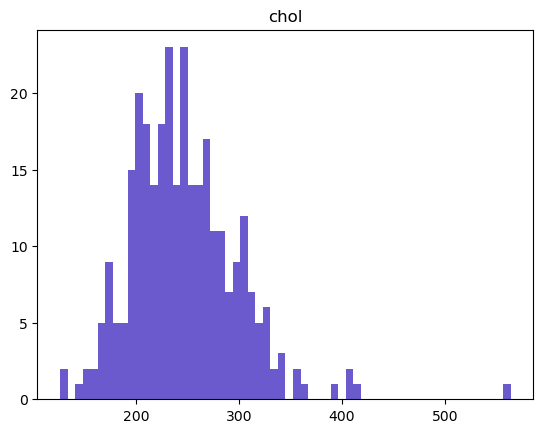

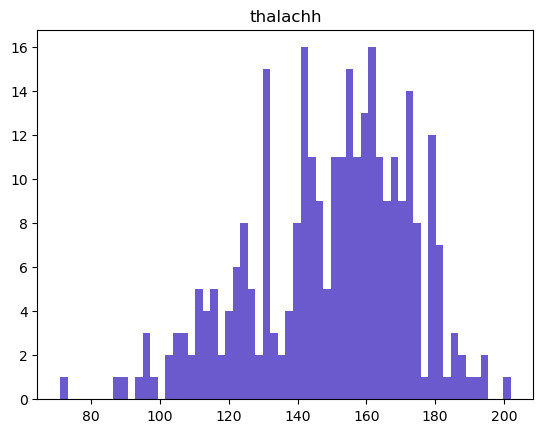

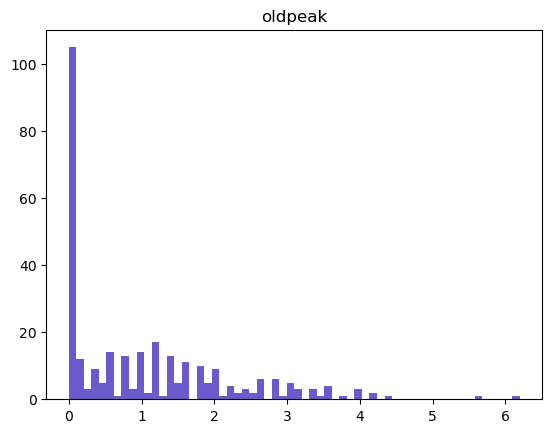

In [29]:
numerical_attributes = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for i in numerical_attributes:
    plt.hist(ha_df[i],bins = 60, color = 'slateblue')
    plt.title(i)
    plt.show()

In [30]:
for i in numerical_attributes:
    print('Values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
    print('\n')

Values in column age : 
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64


Values in column trtbps : 
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    12
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
Name: trtbps, dtype: int64


Values in column chol : 
126    1
1

In [ ]:
#0 no significan missing values.

In [31]:
ha_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


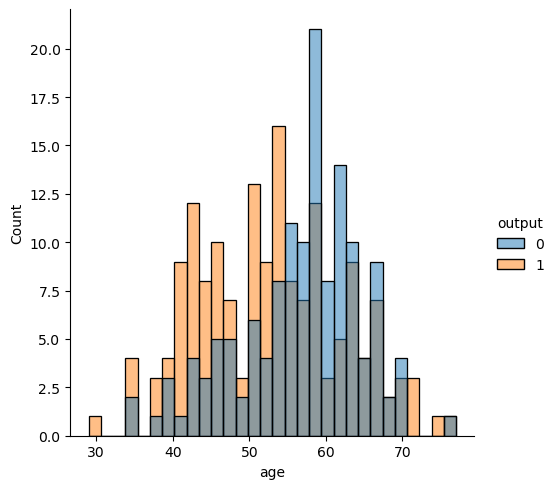

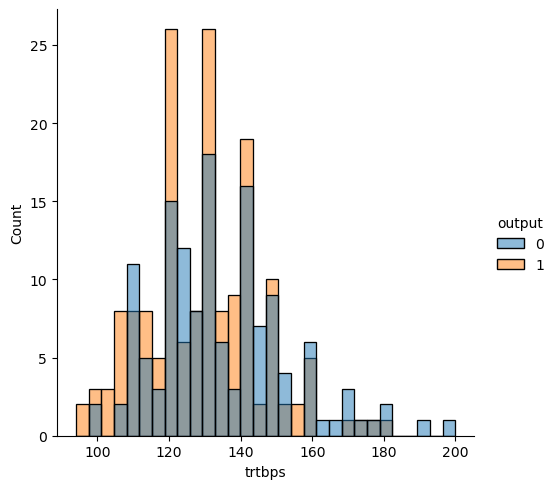

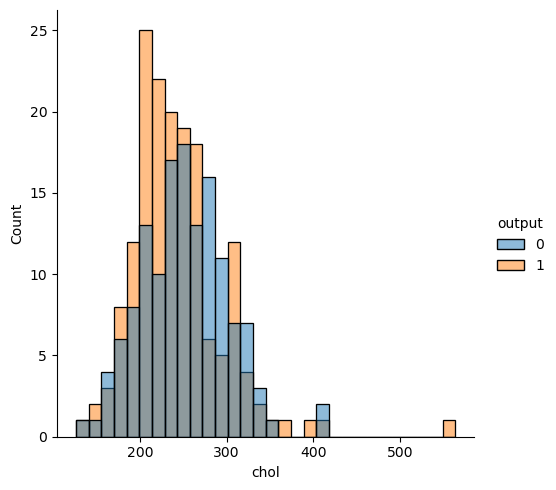

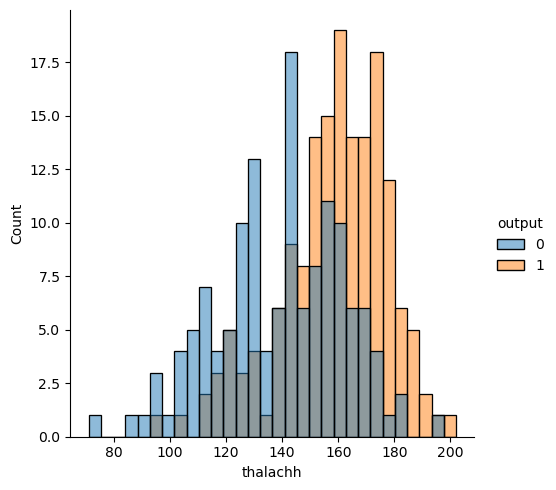

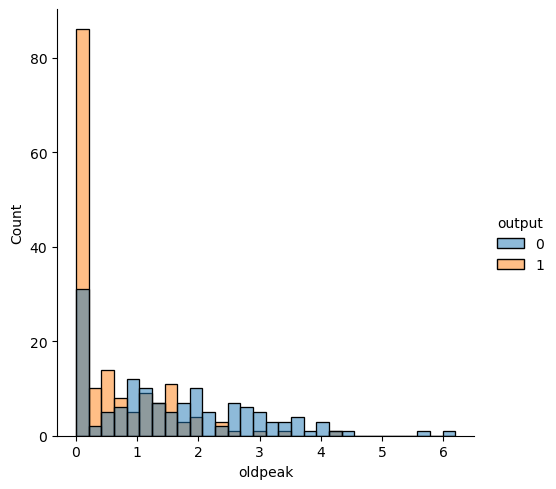

In [45]:
for i in numerical_attributes:
    sns.displot(x=i, data=ha_df, hue="output", bins=30, color="BlGr")

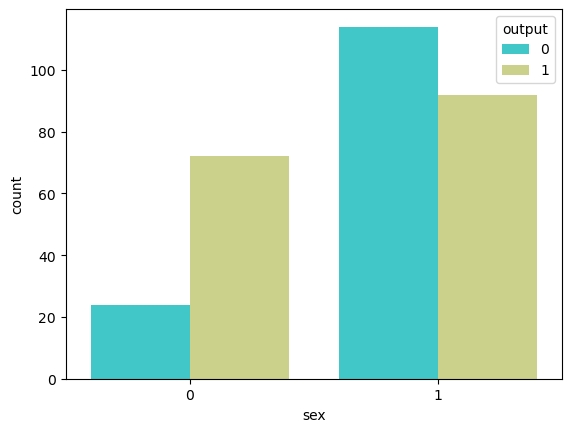

Values in column sex : 
0     96
1    206
Name: sex, dtype: int64




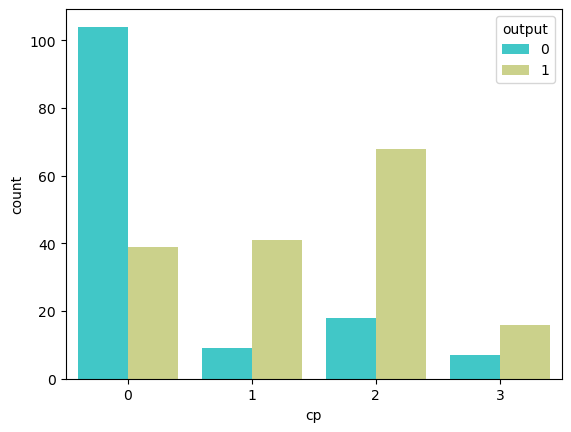

Values in column cp : 
0    143
1     50
2     86
3     23
Name: cp, dtype: int64




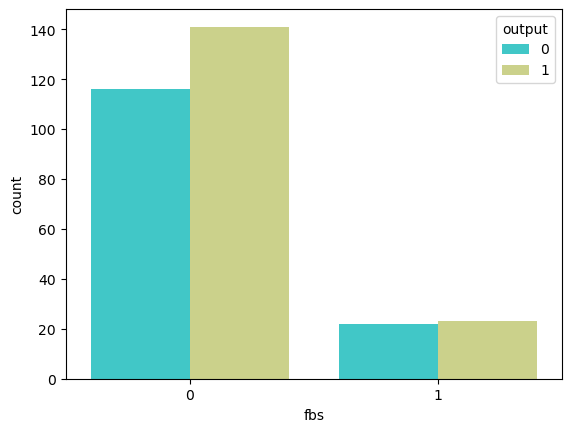

Values in column fbs : 
0    257
1     45
Name: fbs, dtype: int64




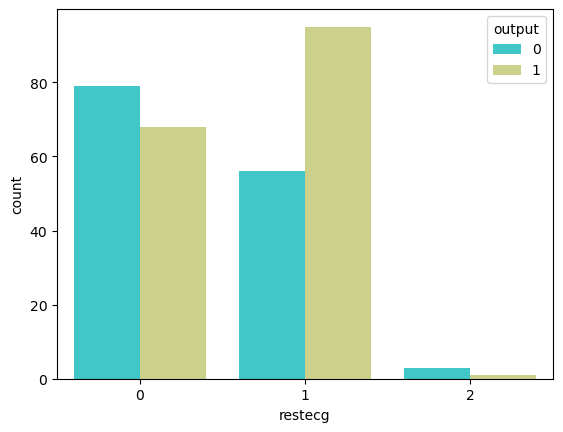

Values in column restecg : 
0    147
1    151
2      4
Name: restecg, dtype: int64




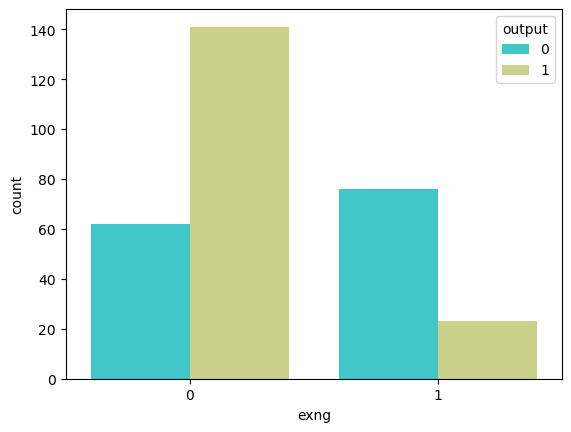

Values in column exng : 
0    203
1     99
Name: exng, dtype: int64




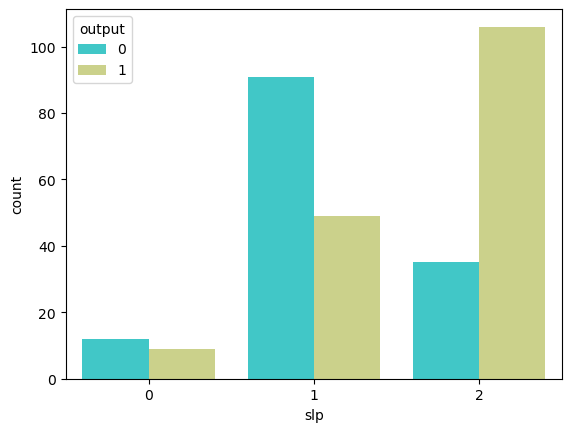

Values in column slp : 
0     21
1    140
2    141
Name: slp, dtype: int64




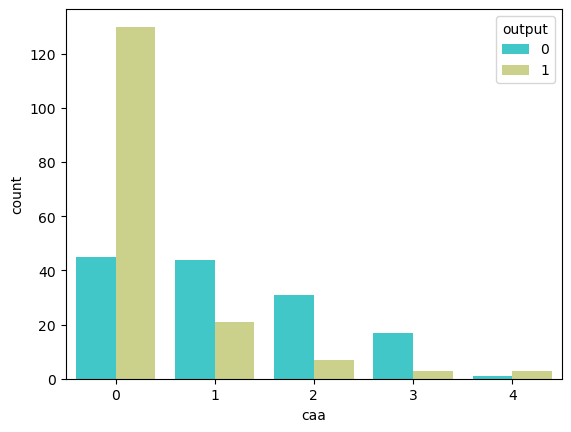

Values in column caa : 
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64




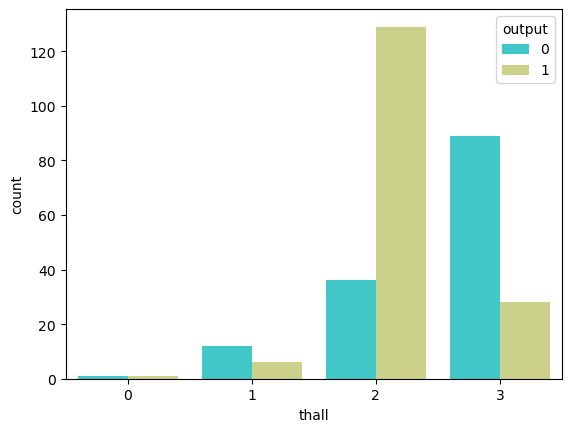

Values in column thall : 
0      2
1     18
2    165
3    117
Name: thall, dtype: int64




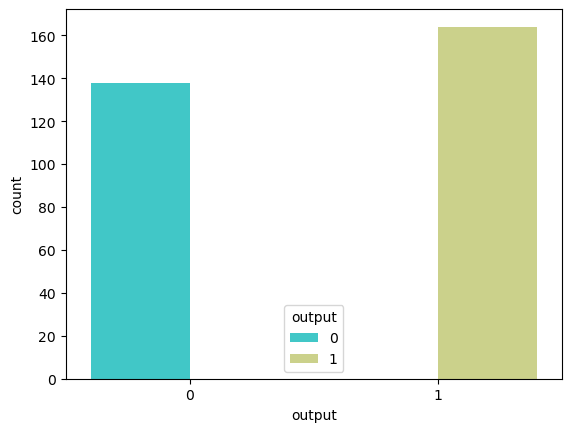

Values in column output : 
0    138
1    164
Name: output, dtype: int64




In [49]:
for i in categorical_cols:
    sns.countplot(x=i,data=ha_df, palette='rainbow',hue='output')
    plt.show()
    print('Values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
    print('\n')


#plt.title("Count of Passengers that Embarked in Each City, Separated by Sex")

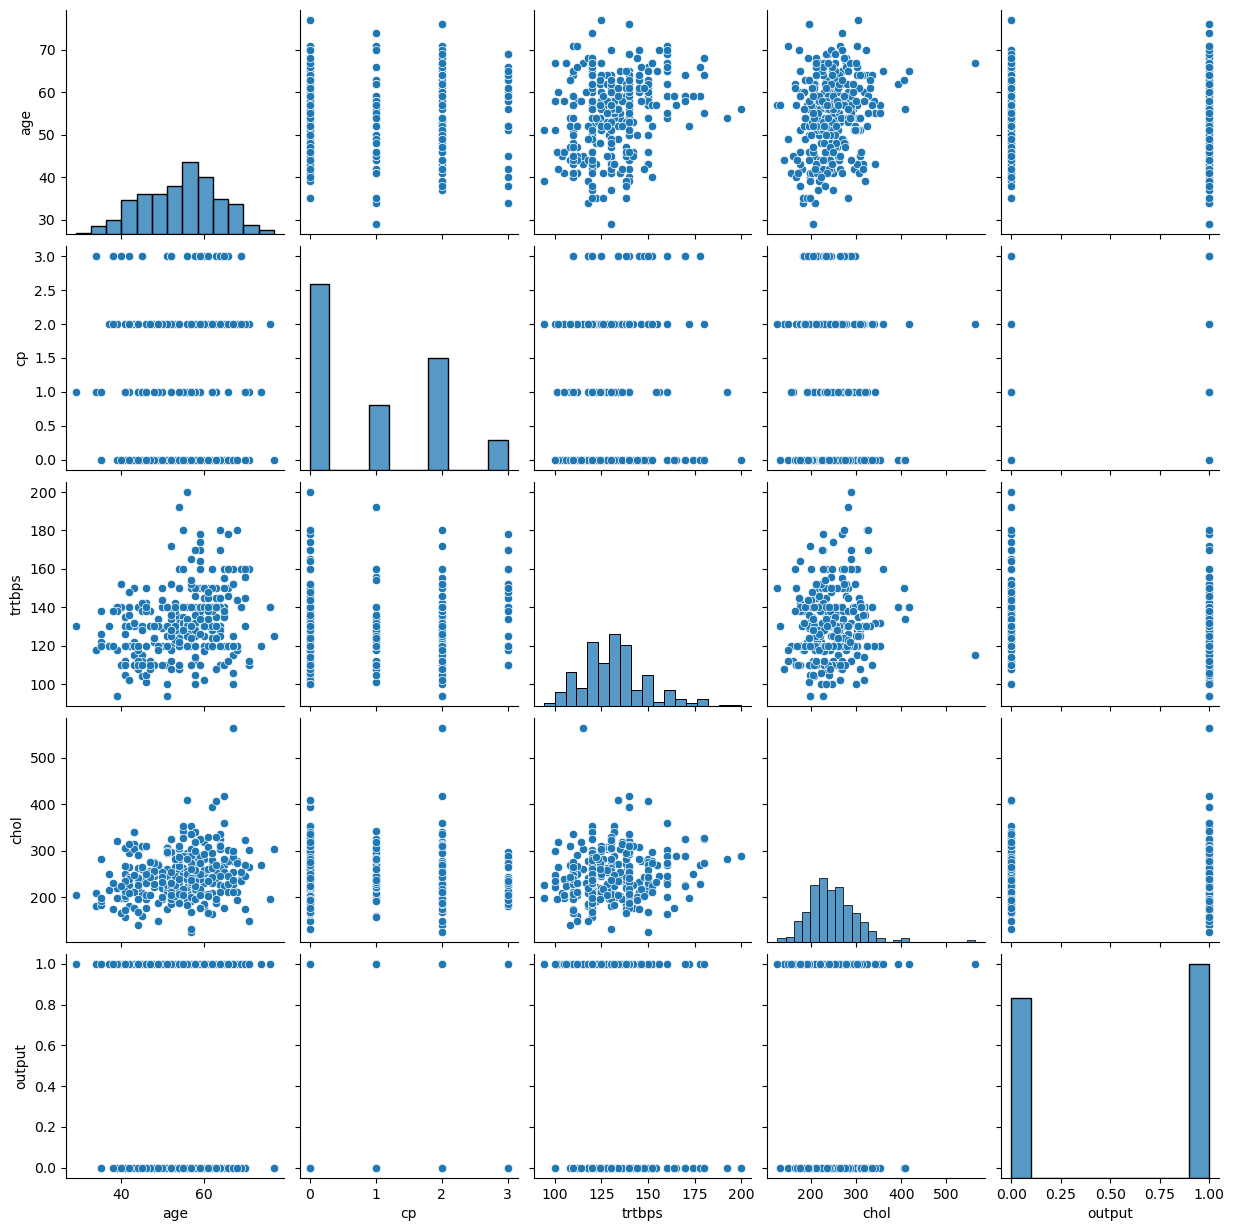

In [37]:
sns.pairplot(ha_df[["age", "cp", "trtbps", 'chol', 'output']])

In [ ]:
#age distribution by output:
plt.figure(figsize=(8, 8))
sns.displot(x="age", data=ha_df, hue="output", bins=30, color="BlGr")

In [38]:
o2_saturation = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
o2_saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [39]:
ha_df["o2_Saturation"] = o2_saturation["98.6"]
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


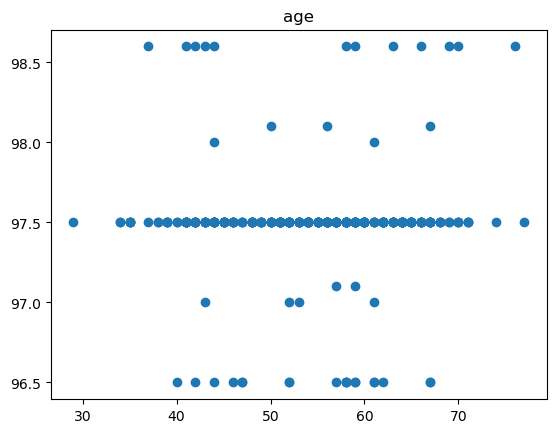

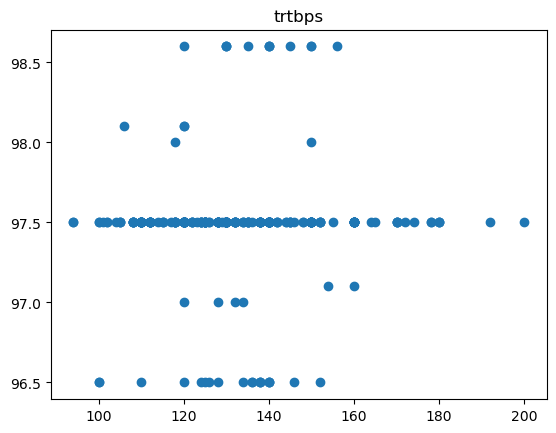

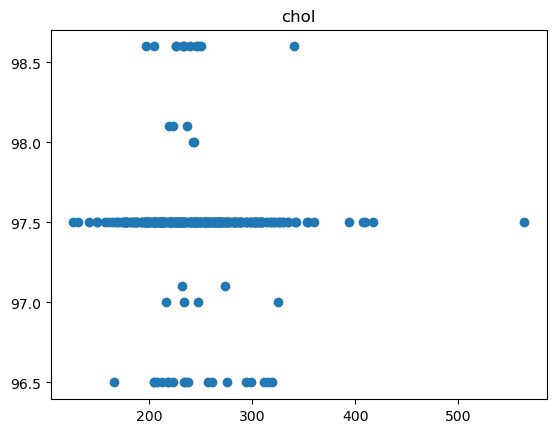

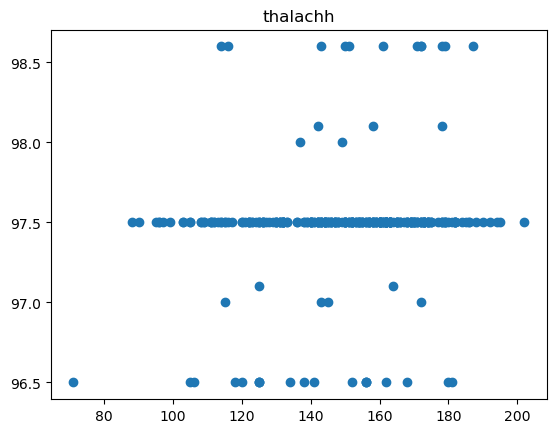

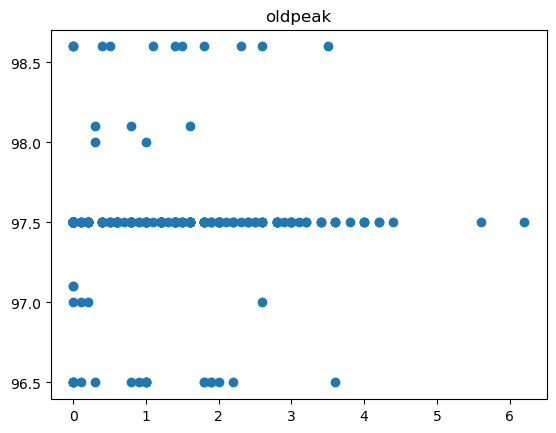

In [44]:
for i in numerical_attributes:
    plt.scatter(ha_df[i], ha_df["o2_Saturation"])
    plt.title(i)
    plt.show()

    

<Axes: >

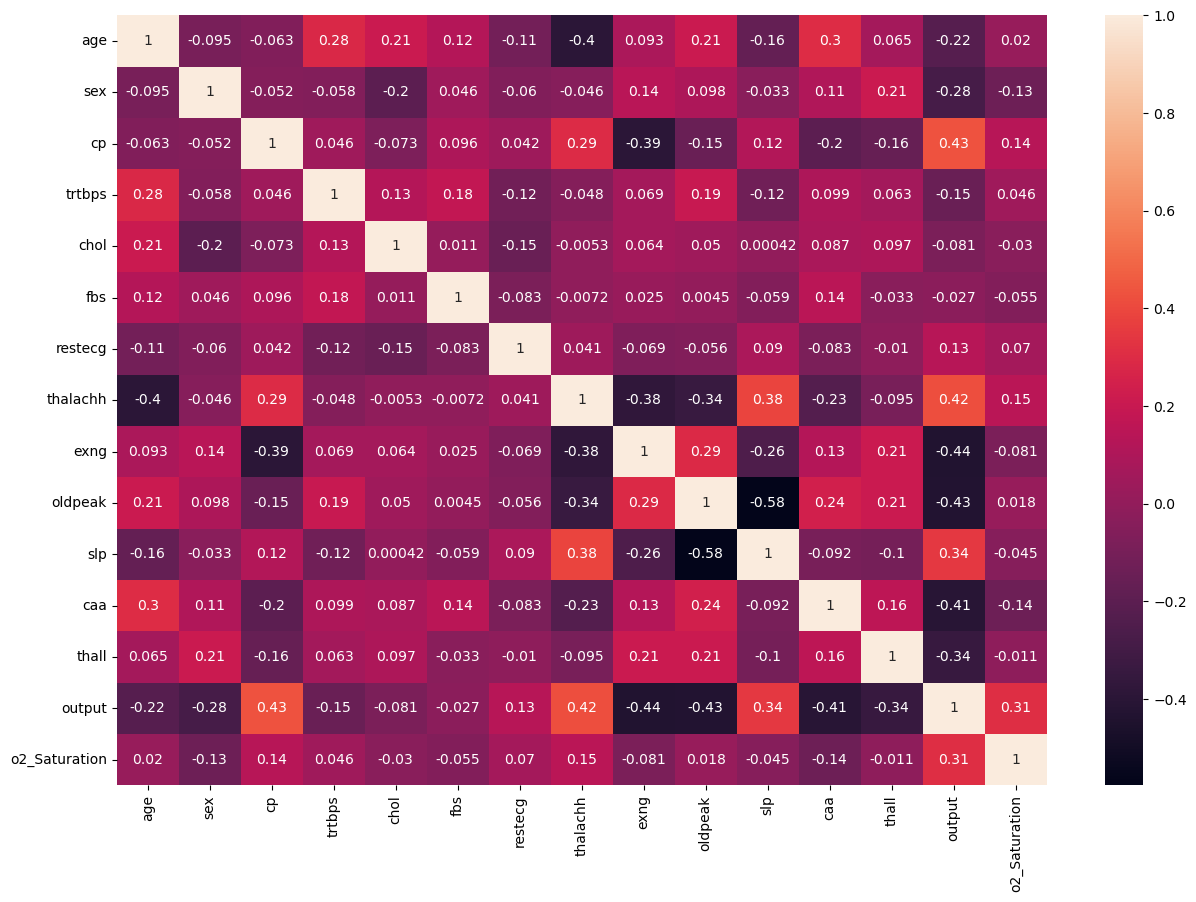

In [53]:
corr = ha_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr,annot=True)

In [54]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ha_df.drop("output", axis=1),
                                                    ha_df["output"],
                                                    test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
RFCls = RandomForestClassifier()
RFCls.fit(X_train, y_train)
RFCls.score(X_test, y_test)

0.8688524590163934

In [56]:
RF_preds = RFCls.predict(X_test)
RF_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[[21  7]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

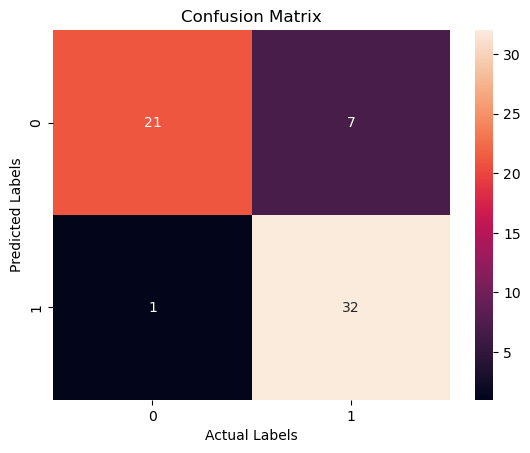

In [58]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, RF_preds))
sns.heatmap(confusion_matrix(y_test, RF_preds),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [59]:
print(classification_report(y_test, RF_preds))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [60]:
#RandomizedSearchCV for hyperparameter turning:
from sklearn.model_selection import RandomizedSearchCV

estimator = RandomForestClassifier()
param_dists = {"n_estimators": [80, 90, 100, 110, 120],
               "max_depth": [5, 10, 15],
               "max_features" : ["auto", "sqrt", "log2"],
               "min_samples_split": [2, 1, 3, 4],
               "min_samples_leaf": [1, 2, 3, 4]}

randomized_model = RandomizedSearchCV(estimator=estimator,
                                      param_distributions=param_dists,
                                      verbose=True,
                                      n_iter=10,
                                      n_jobs=-1,
                                      cv=5)

# Let's fit the model with our Randomized Model 
randomized_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 1, 3, 4],
                                        'n_estimators': [80, 90, 100, 110,
                                                         120]},
                   verbose=True)

In [61]:
randomized_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5}

In [62]:
randomized_model.score(X_test, y_test)

0.8524590163934426

In [63]:
randomized_preds = randomized_model.predict(X_test)
randomized_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[[21  7]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

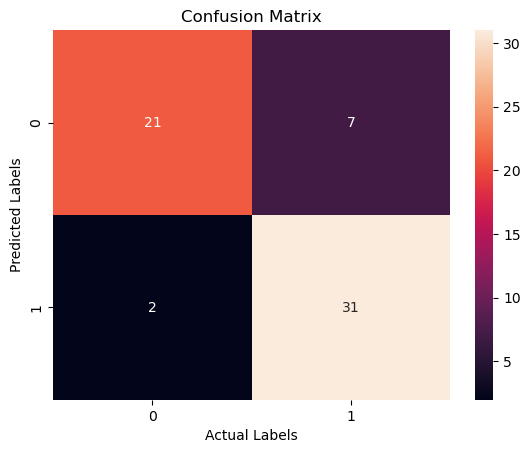

In [65]:
print(confusion_matrix(y_test, RF_preds))
sns.heatmap(confusion_matrix(y_test, randomized_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [66]:
print(classification_report(y_test, randomized_preds))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=90)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
log_reg_preds = log_reg.predict(X_test)
log_reg_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[[20  8]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

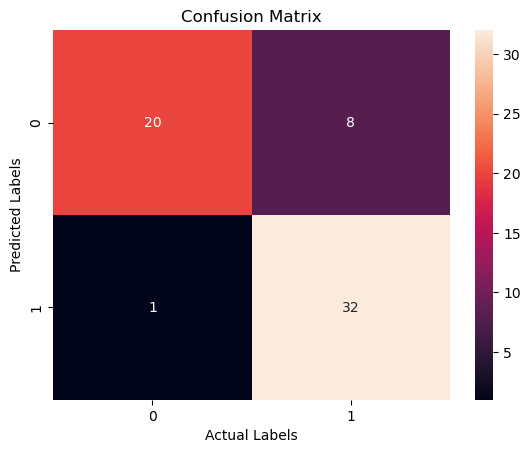

In [68]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, log_reg_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [69]:
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



In [70]:
#MEJORANDO Logistic Regression Model using the GridSearchCV

from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression()
params_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
               "multi_class": ['auto', 'ovr', 'multinomial'],
               "max_iter": [100, 120, 80],
               "solver": ['newton-cg', 'lbfgs', 'liblinear']}

grid_model = GridSearchCV(estimator= estimator,
                          param_grid= params_grid,
                          verbose=True,
                          cv= 5,
                          n_jobs= -1)

grid_model.fit(X_train, y_train)

print(grid_model.best_params_)

grid_model.score(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


0.8879668049792531

Me hemos mejorado usando gridsearchCv

In [71]:
grid_preds = grid_model.predict(X_test)
grid_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[[20  8]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

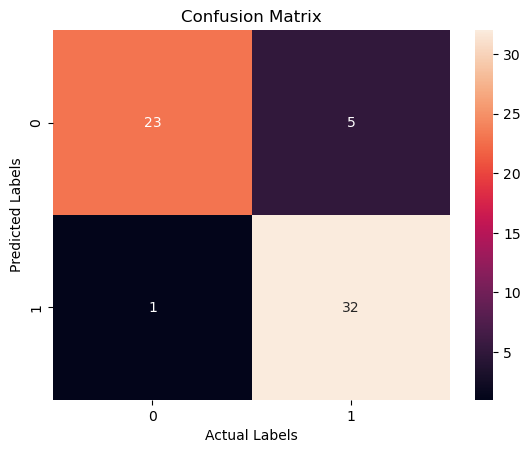

In [72]:
print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, grid_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [73]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [74]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8360655737704918

In [75]:
dtree_preds = dtree.predict(X_test)
dtree_preds

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

[[23  5]
 [ 5 28]]


Text(0.5, 1.0, 'Confusion Matrix')

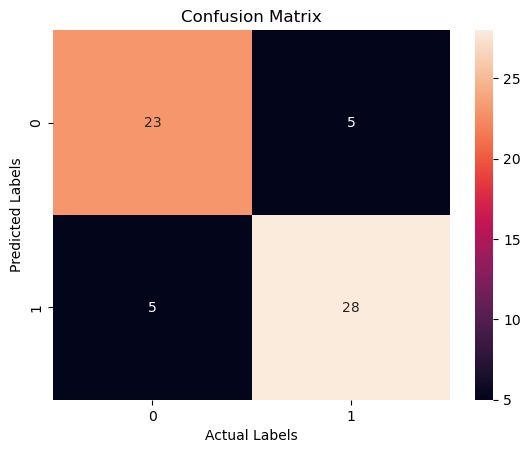

In [76]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, dtree_preds))
sns.heatmap(confusion_matrix(y_test, dtree_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [77]:
print(classification_report(y_test, dtree_preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Let's Standarize and try DTC again!

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler_train = scaler.fit_transform(X_train)
X_scaler_test = scaler.fit_transform(X_test)

# Now, fit the scaled data to the DecsionTreeClassifier

dtree.fit(X_scaler_train, y_train)
dtree.score(X_scaler_test, y_test)

0.8032786885245902

In [81]:
model_scores = {"Forest": RFCls.score(X_test, y_test),
                "Randomized Forest": randomized_model.score(X_test, y_test),
                "Logistic": log_reg.score(X_test, y_test),
                "Grid Logistic": grid_model.score(X_train, y_train),
                "DTree": dtree.score(X_test, y_test),
                "DTree Scaler": dtree.score(X_scaler_test, y_test)}

In [82]:
model_scores

{'Forest': 0.8688524590163934,
 'Randomized Forest': 0.8524590163934426,
 'Logistic': 0.8524590163934426,
 'Grid Logistic': 0.8879668049792531,
 'DTree': 0.45901639344262296,
 'DTree Scaler': 0.8032786885245902}